In [ ]:
!pip install findspark
!pip install xlrd
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# needed in colab, remove this when executing on VMs
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 22.7 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=b286d389aa04dbf43934566b7f06f5a170731d0da1c179d4d887f562b4aba5fa
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [ ]:
sc = pyspark.SparkContext(appName="Pi")
num_samples = 100000000
def inside(p):     
  x, y = random.random(), random.random()
  return x*x + y*y < 1
count = sc.parallelize(range(0, num_samples)).filter(inside).count()
pi = 4 * count / num_samples
print(pi)
sc.stop()

3.14140064


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler as skStandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

import findspark
#findspark.init()
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.types import StructType,\
                              StructField,\
                              IntegerType,\
                              DoubleType,\
                              StringType
from pyspark.ml.feature import StandardScaler, VectorAssembler
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier, NaiveBayes
import random
import pyspark.sql.functions as F
from pyspark.sql.types import ArrayType, DoubleType
from pyspark.ml.linalg import Vector, Vectors
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType
from pyspark.ml.linalg import VectorUDT
import numpy as np


In [ ]:
credit = pd.read_excel('./default of credit card clients.xls', header=1)


spark = SparkSession.builder.master("local[1]").appName("SparkByExamples.com").getOrCreate()

credit_schema = StructType([\
    StructField("ID", IntegerType(), False),
    StructField("LIMIT_BAL", IntegerType(), False),
    StructField("SEX", IntegerType(), False),
    StructField("EDUCATION", IntegerType(), False),
    StructField("MARRIAGE", IntegerType(), False),
    StructField("AGE", IntegerType(), False),
    StructField("PAY_0", IntegerType(), False),
    StructField("PAY_2", IntegerType(), False),
    StructField("PAY_3", IntegerType(), False),
    StructField("PAY_4", IntegerType(), False),
    StructField("PAY_5", IntegerType(), False),
    StructField("PAY_6", IntegerType(), False),
    StructField("BILL_AMT1", IntegerType(), False),
    StructField("BILL_AMT2", IntegerType(), False),
    StructField("BILL_AMT3", IntegerType(), False),
    StructField("BILL_AMT4", IntegerType(), False),
    StructField("BILL_AMT5", IntegerType(), False),
    StructField("BILL_AMT6", IntegerType(), False),
    StructField("PAY_AMT1", IntegerType(), False),
    StructField("PAY_AMT2", IntegerType(), False),
    StructField("PAY_AMT3", IntegerType(), False),
    StructField("PAY_AMT4", IntegerType(), False),
    StructField("PAY_AMT5", IntegerType(), False),
    StructField("PAY_AMT6", IntegerType(), False),
    StructField("default payment next month", IntegerType(), False)])

spark_credit= spark.createDataFrame(credit, schema = credit_schema)
spark_credit.printSchema()

root
 |-- ID: integer (nullable = false)
 |-- LIMIT_BAL: integer (nullable = false)
 |-- SEX: integer (nullable = false)
 |-- EDUCATION: integer (nullable = false)
 |-- MARRIAGE: integer (nullable = false)
 |-- AGE: integer (nullable = false)
 |-- PAY_0: integer (nullable = false)
 |-- PAY_2: integer (nullable = false)
 |-- PAY_3: integer (nullable = false)
 |-- PAY_4: integer (nullable = false)
 |-- PAY_5: integer (nullable = false)
 |-- PAY_6: integer (nullable = false)
 |-- BILL_AMT1: integer (nullable = false)
 |-- BILL_AMT2: integer (nullable = false)
 |-- BILL_AMT3: integer (nullable = false)
 |-- BILL_AMT4: integer (nullable = false)
 |-- BILL_AMT5: integer (nullable = false)
 |-- BILL_AMT6: integer (nullable = false)
 |-- PAY_AMT1: integer (nullable = false)
 |-- PAY_AMT2: integer (nullable = false)
 |-- PAY_AMT3: integer (nullable = false)
 |-- PAY_AMT4: integer (nullable = false)
 |-- PAY_AMT5: integer (nullable = false)
 |-- PAY_AMT6: integer (nullable = false)
 |-- default 

In [ ]:
print(credit.dtypes)

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object


In [ ]:
credit.head()
spark_credit.show()

+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+--------------------------+
| ID|LIMIT_BAL|SEX|EDUCATION|MARRIAGE|AGE|PAY_0|PAY_2|PAY_3|PAY_4|PAY_5|PAY_6|BILL_AMT1|BILL_AMT2|BILL_AMT3|BILL_AMT4|BILL_AMT5|BILL_AMT6|PAY_AMT1|PAY_AMT2|PAY_AMT3|PAY_AMT4|PAY_AMT5|PAY_AMT6|default payment next month|
+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+--------------------------+
|  1|    20000|  2|        2|       1| 24|    2|    2|   -1|   -1|   -2|   -2|     3913|     3102|      689|        0|        0|        0|       0|     689|       0|       0|       0|       0|                         1|
|  2|   120000|  2|        2|       2| 26|   -1|    2|    0|    0|    0|    2|     2682|     1725|     2682|     3272|  

In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
credit = credit.drop('ID', axis = 1)
print(credit.head())

spark_credit = spark_credit.drop('ID')
spark_credit.show()

   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0     

In [ ]:
credit.duplicated().sum()

35

In [ ]:
credit = credit.drop_duplicates()
spark_credit = spark_credit.distinct()

Distribution plots, needed to check if data are normalized

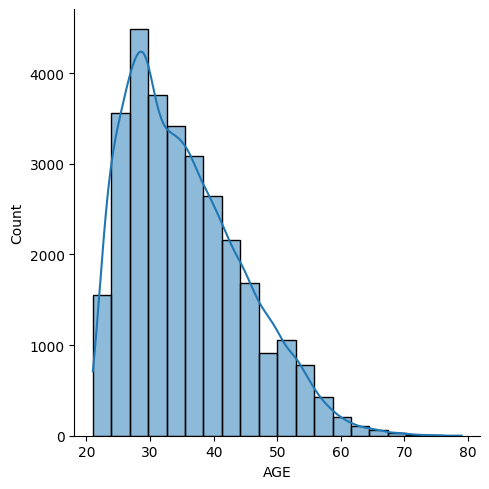

In [ ]:
sns.displot(credit['AGE'], bins = 20, kde = True)

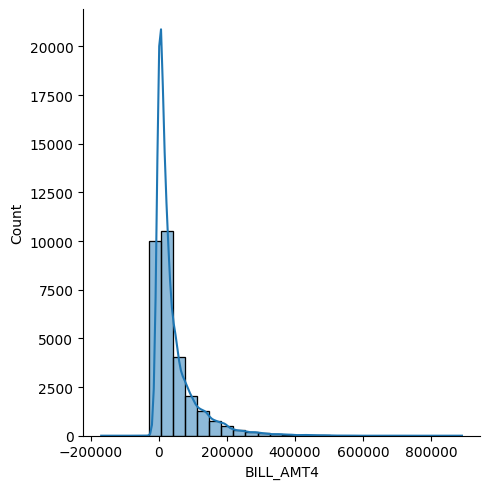

In [ ]:
sns.displot(credit['BILL_AMT4'], bins = 30, kde = True)

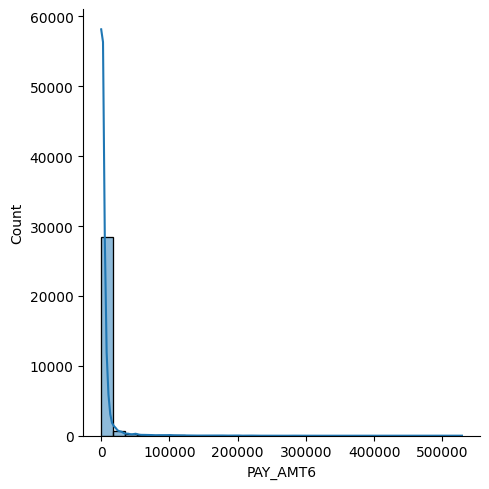

In [ ]:
sns.displot(credit['PAY_AMT6'], bins = 30, kde = True)

<AxesSubplot: >

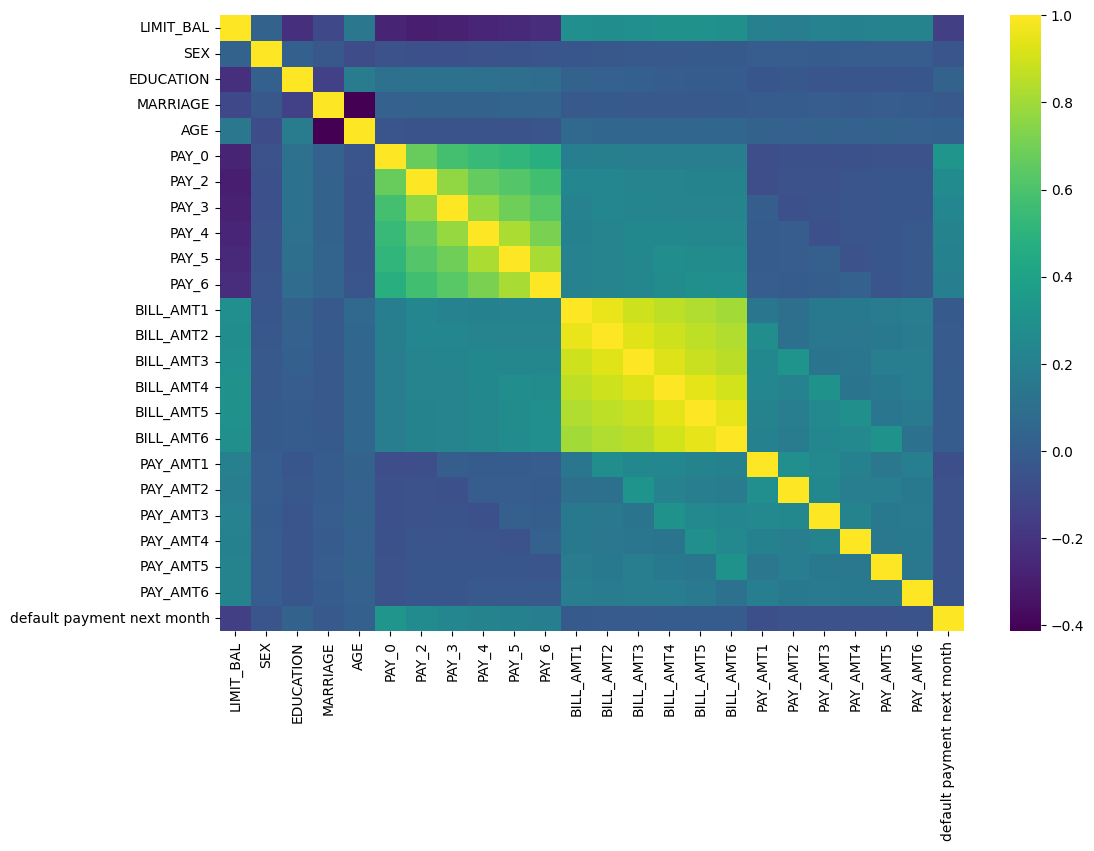

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(credit.corr(), cmap = 'viridis')

<AxesSubplot: xlabel='SEX', ylabel='count'>

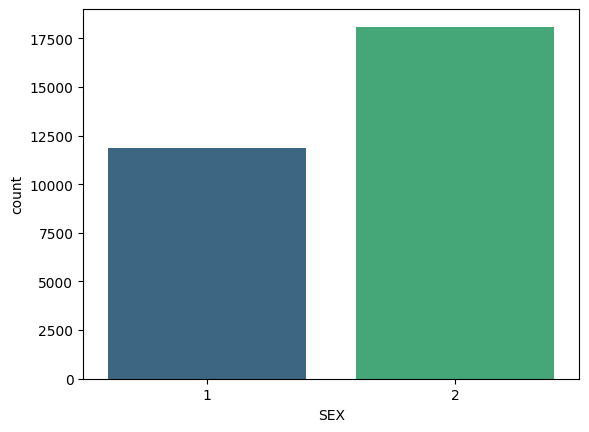

In [ ]:
sns.countplot(x = 'SEX', data= credit, palette = 'viridis')

In [ ]:
credit['SEX'].value_counts()

2    18091
1    11874
Name: SEX, dtype: int64

<AxesSubplot: xlabel='SEX', ylabel='count'>

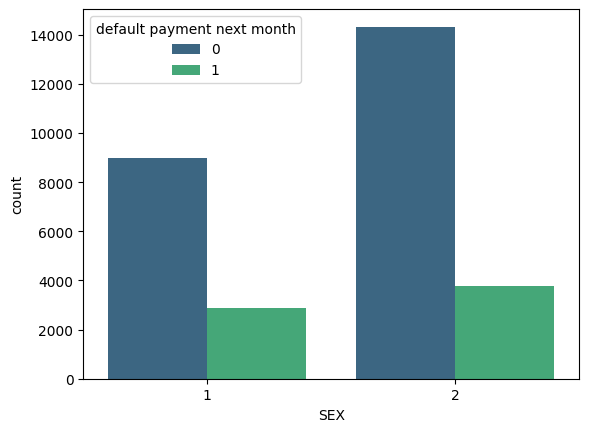

In [ ]:
sns.countplot(x = 'SEX', data = credit, palette = 'viridis', hue = 'default payment next month')

In [ ]:
credit['EDUCATION'].value_counts()

2    14019
1    10563
3     4915
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

<AxesSubplot: xlabel='EDUCATION', ylabel='count'>

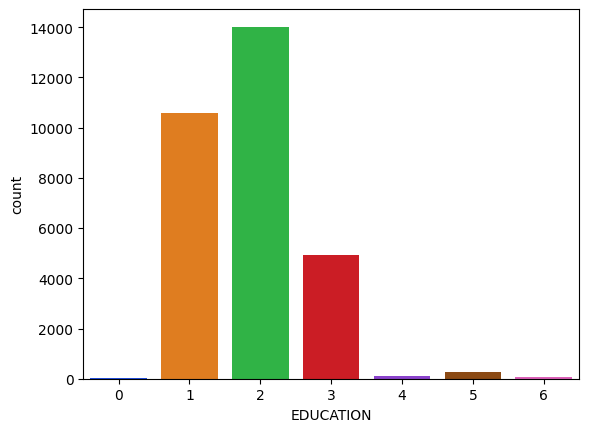

In [ ]:
sns.countplot(x ='EDUCATION', data = credit, palette = 'bright')

<AxesSubplot: xlabel='EDUCATION', ylabel='count'>

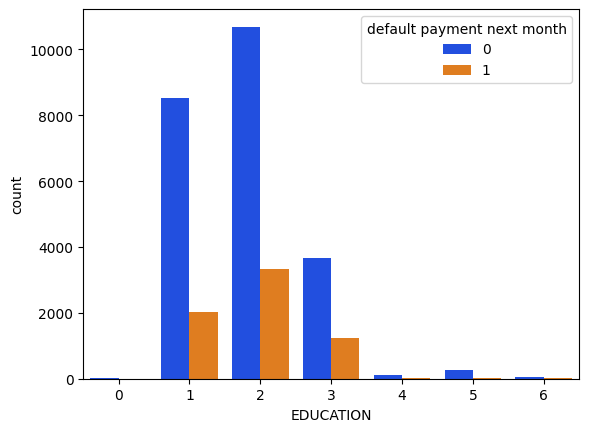

In [ ]:
sns.countplot(x = 'EDUCATION', data = credit, palette = 'bright', hue = 'default payment next month')

In [ ]:
credit['MARRIAGE'].value_counts()

2    15945
1    13643
3      323
0       54
Name: MARRIAGE, dtype: int64

<AxesSubplot: xlabel='MARRIAGE', ylabel='count'>

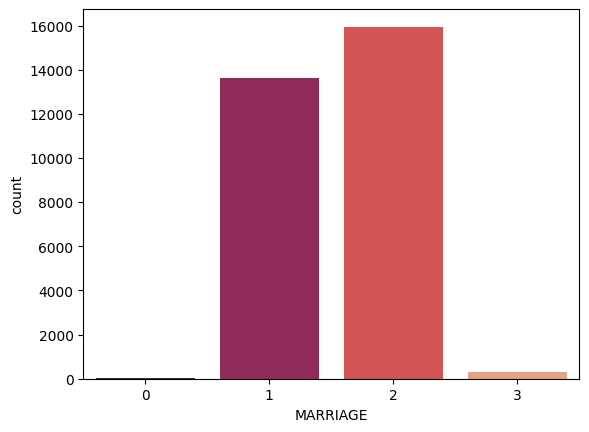

In [ ]:
sns.countplot(x = 'MARRIAGE', data = credit, palette = 'rocket')

<AxesSubplot: xlabel='MARRIAGE', ylabel='count'>

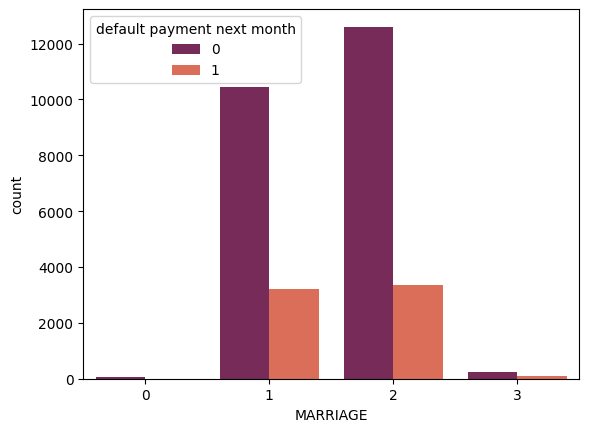

In [ ]:
sns.countplot(x = 'MARRIAGE', data = credit, palette = 'rocket', hue = 'default payment next month')

<AxesSubplot: xlabel='LIMIT_BAL'>

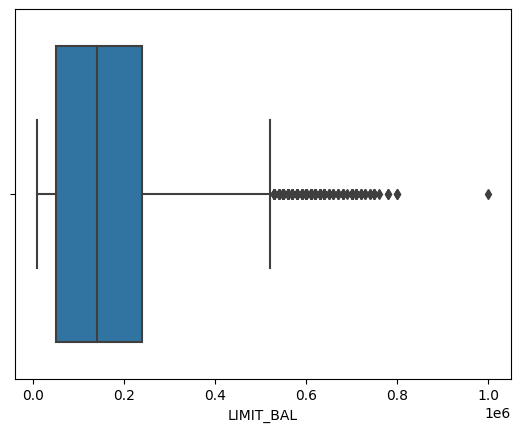

In [ ]:
sns.boxplot(x = 'LIMIT_BAL', data = credit)

<AxesSubplot: xlabel='PAY_AMT6'>

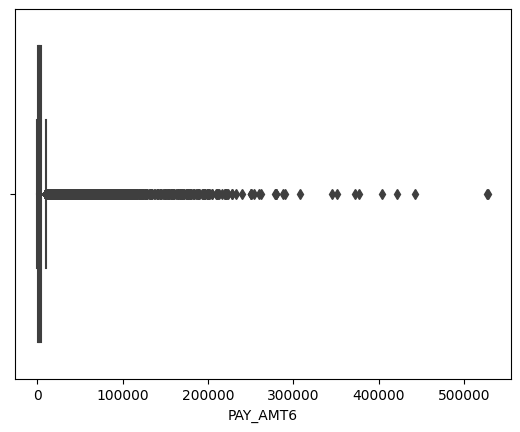

In [ ]:
sns.boxplot(x = 'PAY_AMT6', data = credit)

Elimination of the outliers in the figure above

In [ ]:
credit = credit[(credit['LIMIT_BAL'] <= 550000) & (credit['PAY_AMT6'] <= 50000)]
spark_credit = spark_credit.where(col('LIMIT_BAL') <= 550000 ).where(col('PAY_AMT6') <= 50000)

In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29327 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   29327 non-null  int64
 1   SEX                         29327 non-null  int64
 2   EDUCATION                   29327 non-null  int64
 3   MARRIAGE                    29327 non-null  int64
 4   AGE                         29327 non-null  int64
 5   PAY_0                       29327 non-null  int64
 6   PAY_2                       29327 non-null  int64
 7   PAY_3                       29327 non-null  int64
 8   PAY_4                       29327 non-null  int64
 9   PAY_5                       29327 non-null  int64
 10  PAY_6                       29327 non-null  int64
 11  BILL_AMT1                   29327 non-null  int64
 12  BILL_AMT2                   29327 non-null  int64
 13  BILL_AMT3                   29327 non-null  int64
 14  BILL_A

In [ ]:
print(spark_credit.dtypes)
spark_credit.summary().show()

[('LIMIT_BAL', 'int'), ('SEX', 'int'), ('EDUCATION', 'int'), ('MARRIAGE', 'int'), ('AGE', 'int'), ('PAY_0', 'int'), ('PAY_2', 'int'), ('PAY_3', 'int'), ('PAY_4', 'int'), ('PAY_5', 'int'), ('PAY_6', 'int'), ('BILL_AMT1', 'int'), ('BILL_AMT2', 'int'), ('BILL_AMT3', 'int'), ('BILL_AMT4', 'int'), ('BILL_AMT5', 'int'), ('BILL_AMT6', 'int'), ('PAY_AMT1', 'int'), ('PAY_AMT2', 'int'), ('PAY_AMT3', 'int'), ('PAY_AMT4', 'int'), ('PAY_AMT5', 'int'), ('PAY_AMT6', 'int'), ('default payment next month', 'int')]
+-------+------------------+-------------------+------------------+------------------+-----------------+--------------------+--------------------+-------------------+--------------------+--------------------+------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+----------------+------------------+------------------+------------------+--------------------------+
|summary|         

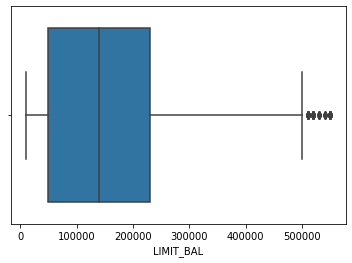

In [ ]:
sns.boxplot(x = 'LIMIT_BAL', data = credit)

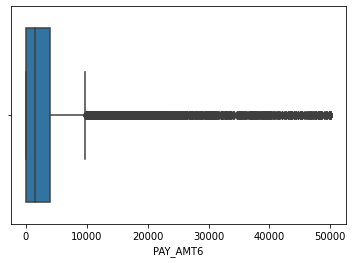

In [ ]:
sns.boxplot(x = 'PAY_AMT6', data = credit)

In [ ]:
scaler = skStandardScaler()
scaler.fit(credit.drop('default payment next month', axis = 1))

StandardScaler()

In [ ]:
scaled_data = scaler.transform(credit.drop('default payment next month', axis = 1))

In [ ]:
credit_feat = pd.DataFrame(scaled_data, columns = credit.columns[:-1])
credit_feat.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.146378,0.808940,0.182305,-1.056795,-1.241270,1.788771,1.773656,-0.699807,-0.668688,-1.528863,...,-0.674054,-0.680242,-0.671047,-0.663140,-0.364489,-0.231546,-0.325252,-0.318125,-0.315033,-0.570231
1,-0.346094,0.808940,0.182305,0.857668,-1.024592,-0.881562,1.773656,0.133299,0.183409,0.229686,...,-0.644340,-0.627583,-0.612305,-0.606703,-0.364489,-0.216751,-0.258688,-0.248441,-0.315033,-0.223923
2,-0.586179,0.808940,0.182305,0.857668,-0.157878,0.008549,0.106570,0.133299,0.183409,0.229686,...,-0.482174,-0.449602,-0.416901,-0.394039,-0.260592,-0.192965,-0.258688,-0.248441,-0.245368,0.295538
3,-0.906293,0.808940,0.182305,-1.056795,0.167139,0.008549,0.106570,0.133299,0.183409,0.229686,...,0.050559,-0.224564,-0.178685,-0.151781,-0.227602,-0.168276,-0.245375,-0.241473,-0.240561,-0.397077
4,-0.906293,-1.236186,0.182305,-1.056795,2.333923,-0.881562,0.106570,-0.699807,0.183409,0.229686,...,-0.150058,-0.343239,-0.345526,-0.332047,-0.227602,1.480638,0.340382,0.309034,-0.267034,-0.452660


In [ ]:
train_cred, test_cred = spark_credit.randomSplit([0.7, 0.3], seed = 1234)
print(train_cred.show())
print(test_cred.show())

+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+--------------------------+
|LIMIT_BAL|SEX|EDUCATION|MARRIAGE|AGE|PAY_0|PAY_2|PAY_3|PAY_4|PAY_5|PAY_6|BILL_AMT1|BILL_AMT2|BILL_AMT3|BILL_AMT4|BILL_AMT5|BILL_AMT6|PAY_AMT1|PAY_AMT2|PAY_AMT3|PAY_AMT4|PAY_AMT5|PAY_AMT6|default payment next month|
+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+--------------------------+
|    10000|  1|        1|       1| 41|    0|    0|    3|    2|    2|    2|     6859|     9751|     9451|     9169|    10056|     8559|    3000|       0|       0|    1002|       0|     500|                         0|
|    10000|  1|        1|       1| 42|    4|    3|    2|    2|    2|    0|     6744|     6494|     6247|     7975|     7701|     7787|  

In [ ]:
import pyspark.sql.functions as f

col_list = [spark_credit.dtypes[i][0] for i in range(0, len(spark_credit.dtypes)-1)]
#credit_to_scale_with_mean = credit_to_scale.union(credit_to_scale.select(*[f.avg(c).alias(c) for c in credit_to_scale.columns]))
#print(credit_to_scale_with_mean)
credit_vec_ass = VectorAssembler(inputCols = col_list, outputCol = "temp_features")
#credit_assembled = credit_vec_ass.transform(credit_to_scale_with_mean)

credit_assembled = credit_vec_ass.transform(spark_credit)
train_assembled = credit_vec_ass.transform(train_cred)
test_assembled = credit_vec_ass.transform(test_cred)

# in "Scaled" there will be values scaled with the corrected sample standard deviation,
# instead of the population-based standard deviation, thus results may be different
spark_scaler = StandardScaler(withMean=True, withStd=True, inputCol="temp_features", outputCol="scaled")
fitted_scaler = spark_scaler.fit(dataset = credit_assembled)
scaled_data = fitted_scaler.transform(credit_assembled)
scaled_train = fitted_scaler.transform(train_assembled)
scaled_test = fitted_scaler.transform(test_assembled)

vectorized_scaled_data = scaled_data.select(["scaled", "default payment next month"])
vectorized_scaled_train = scaled_train.select(["scaled", "default payment next month"])
vectorized_scaled_test = scaled_test.select(["scaled", "default payment next month"])
print(vectorized_scaled_data.show())
print(vectorized_scaled_train.show())
print(vectorized_scaled_test.show())

+--------------------+--------------------------+
|              scaled|default payment next month|
+--------------------+--------------------------+
|[-1.1463588717526...|                         1|
|[-0.3460880264538...|                         1|
|[-0.5861692800434...|                         0|
|[-0.9062776181630...|                         0|
|[-0.9062776181630...|                         0|
|[-0.9062776181630...|                         0|
|[2.69494118568170...|                         0|
|[-0.5061421955136...|                         0|
|[-0.1860338573940...|                         0|
|[-1.1463588717526...|                         0|
|[0.29412864978522...|                         0|
|[0.77429115696452...|                         0|
|[-0.7462234491032...|                         1|
|[0.69426407243463...|                         0|
|[-0.9062776181630...|                         0|
|[-1.1463588717526...|                         1|
|[1.25445366414381...|                         0|


In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import scikitplot as skplt


def plot_cumulative_gains(y_true, y_preds):
  #sorted_indices = np.argsort(y_preds)
  #cumulative_sum = np.cumsum(y_true[sorted_indices])
  #lift = cumulative_sum / (np.arange(len(y_true)) + 1)
  #cumulative_gains = cumulative_sum / np.sum(y_true)
  #plt.plot(np.arange(len(y_true)), cumulative_gains)

  skplt.metrics.plot_cumulative_gain(y_true, y_preds)
  plt.xlabel("Number of observations")
  plt.ylabel("Cumulative number of true positive predictions")
  plt.title("Cumulative Gains Chart")
  plt.show()

In [ ]:
# Logistic Regression
blor = LogisticRegression(featuresCol="scaled", labelCol="default payment next month", regParam = 0.01, maxIter = 10)
blorModel = blor.fit(vectorized_scaled_train)
print(blorModel.evaluate(vectorized_scaled_test))

In [ ]:
print(str(blorModel.summary.accuracy))
print(blorModel.evaluate(vectorized_scaled_test).accuracy)

0.8074283210826072
0.8072343803152285


              precision    recall  f1-score   support

           0       0.81      0.97      0.89      6857
           1       0.72      0.22      0.34      1962

    accuracy                           0.81      8819
   macro avg       0.77      0.60      0.61      8819
weighted avg       0.79      0.81      0.77      8819



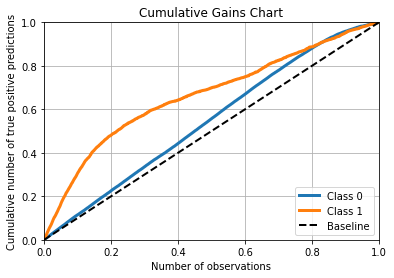

In [ ]:
Y_true = vectorized_scaled_test.select("default payment next month").collect()
test_cred_no_def = vectorized_scaled_test.select("scaled")
Y_pred_df = blorModel.transform(test_cred_no_def)
Y_pred_probabilities = Y_pred_df.select("probability").collect()
Y_pred_predictions = Y_pred_df.select("prediction").collect()

Y_pred_probabilities_np = np.array(Y_pred_probabilities)
Y_pred_probabilities_np = np.reshape(Y_pred_probabilities_np, (Y_pred_probabilities_np.shape[0], 2))

#print(Y_pred_probabilities_np)
print(classification_report(Y_true, Y_pred_predictions))
plot_cumulative_gains(np.array(Y_true), Y_pred_probabilities_np)

In [ ]:
vectorized_scaled_train.show()

+--------------------+--------------------------+
|              scaled|default payment next month|
+--------------------+--------------------------+
|[-1.2263859562825...|                         0|
|[-1.2263859562825...|                         0|
|[-1.2263859562825...|                         0|
|[-1.2263859562825...|                         0|
|[-1.2263859562825...|                         1|
|[-1.2263859562825...|                         0|
|[-1.2263859562825...|                         1|
|[-1.2263859562825...|                         1|
|[-1.2263859562825...|                         1|
|[-1.2263859562825...|                         0|
|[-1.2263859562825...|                         0|
|[-1.2263859562825...|                         0|
|[-1.2263859562825...|                         0|
|[-1.2263859562825...|                         1|
|[-1.2263859562825...|                         0|
|[-1.2263859562825...|                         1|
|[-1.2263859562825...|                         0|


In [ ]:
from pyspark.ml.linalg import DenseVector
from pyspark.ml.linalg import Vectors, VectorUDT

def split_array_to_list(col):
    def to_list(v):
        return v.toArray().tolist()
    return F.udf(to_list, ArrayType(DoubleType()))(col)

def getMinArray(vectorized_scaled_data):
    unpacked_data = vectorized_scaled_data.select(split_array_to_list(F.col("scaled")).alias("splitted")).select([F.col("splitted")[i].alias(str(col_list[i])) for i in range(len(col_list))])
    min_row = unpacked_data.select([F.min(str(col_list[i])).alias(str(col_list[i])) for i in range(len(col_list))])
    min_row = credit_vec_ass.transform(min_row).select(F.col("temp_features").alias("scaled"))
    min_array = min_row.first().asDict().get("scaled")
    return min_array.toArray()

min_arr = getMinArray(vectorized_scaled_data)
print(type(min_arr))
print(min_arr)

<class 'numpy.ndarray'>
[-1.22638596 -1.23616489 -2.35694674 -2.97120827 -1.56626077 -1.77164336
 -1.56048846 -1.53288759 -1.52075935 -1.52883661 -1.48575576 -3.03825274
 -1.71178138 -3.02894361 -3.41611821 -2.05385621 -2.30073858 -0.36448309
 -0.26431774 -0.32524604 -0.31812007 -0.31502736 -0.57022135]


In [ ]:
def remove_negative_values(vectorized_scaled, min_array):
  unpacked_data = vectorized_scaled.select(split_array_to_list(F.col("scaled")).alias("splitted"), F.col("default payment next month"))\
  .select([F.col("splitted")[i].alias(str(col_list[i])) if i < len(col_list) else F.col("default payment next month") for i in range(len(col_list)+1)])
  for i in range(len(col_list)):
    if min_array[i] < 0:
      unpacked_data = unpacked_data.withColumn(str(col_list[i]) + "_positive", F.col(str(col_list[i])) - min_array[i])
      unpacked_data = unpacked_data.drop(str(col_list[i]))

  unpacked_col_list = [unpacked_data.dtypes[i][0] for i in range(0, len(unpacked_data.dtypes) - 1)]
  vec_ass = VectorAssembler(inputCols = unpacked_col_list, outputCol = "temp_features")
  vec_unpacked_data = vec_ass.transform(unpacked_data).select("temp_features", "default payment next month")
  return vec_unpacked_data

vectorized_positive_train = remove_negative_values(vectorized_scaled_train, min_arr)
vectorized_positive_test = remove_negative_values(vectorized_scaled_test, min_arr)

In [ ]:
# Classification Tree
dec_tree = DecisionTreeClassifier(featuresCol="scaled", labelCol="default payment next month")
dec_tree_model = dec_tree.fit(vectorized_scaled_train)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6857
           1       0.67      0.37      0.47      1962

    accuracy                           0.82      8819
   macro avg       0.76      0.66      0.68      8819
weighted avg       0.80      0.82      0.80      8819



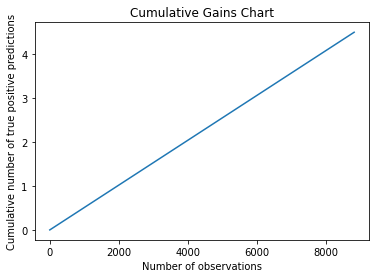

In [ ]:
test_cred_no_def = vectorized_scaled_test.select("scaled")
Y_pred_df = dec_tree_model.transform(test_cred_no_def)
Y_pred = Y_pred_df.select("prediction").collect()
print(classification_report(Y_true, Y_pred))
plot_cumulative_gains(np.array(Y_true), np.array(Y_pred))

In [ ]:
# Naive Bayes
naive_b = NaiveBayes(smoothing=1.0, modelType="multinomial", featuresCol="temp_features", labelCol="default payment next month")
model_naive_b = naive_b.fit(vectorized_positive_train) 
test_cred_no_def = vectorized_positive_test.select("temp_features")
Y_true = vectorized_positive_test.select("default payment next month").collect()
Y_pred_df = model_naive_b.transform(test_cred_no_def)
Y_pred = Y_pred_df.select("prediction").collect()
print(classification_report(Y_true, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      7026
           1       0.88      1.00      0.93      1976

    accuracy                           0.97      9002
   macro avg       0.94      0.98      0.96      9002
weighted avg       0.97      0.97      0.97      9002



In [ ]:
from pyspark.ml.feature import MinMaxScaler
min_max_scaler = MinMaxScaler(min=0.0, max=1.0, inputCol='scaled', outputCol="min_maxed_scaled")
fitted_min_max_scaler = min_max_scaler.fit(vectorized_scaled_data)
mm_scaled_train = fitted_min_max_scaler.transform(vectorized_scaled_train).select("min_maxed_scaled", "default payment next month")
mm_scaled_test = fitted_min_max_scaler.transform(vectorized_scaled_test).select("min_maxed_scaled", "default payment next month")

mm_scaled_train.show()

+--------------------+--------------------------+
|    min_maxed_scaled|default payment next month|
+--------------------+--------------------------+
|[0.0,0.0,0.166666...|                         0|
|[0.0,0.0,0.166666...|                         0|
|[0.0,0.0,0.166666...|                         0|
|[0.0,0.0,0.166666...|                         0|
|[0.0,0.0,0.166666...|                         1|
|[0.0,0.0,0.166666...|                         0|
|[0.0,0.0,0.166666...|                         1|
|[0.0,0.0,0.166666...|                         1|
|[0.0,0.0,0.166666...|                         1|
|[0.0,0.0,0.166666...|                         0|
|[0.0,0.0,0.166666...|                         0|
|[0.0,0.0,0.166666...|                         0|
|(23,[2,3,4,5,11,1...|                         0|
|[0.0,0.0,0.166666...|                         1|
|[0.0,0.0,0.166666...|                         0|
|[0.0,0.0,0.166666...|                         1|
|[0.0,0.0,0.166666...|                         0|


In [ ]:
from pyspark.ml.classification import MultilayerPerceptronClassifier

#print(help(MultilayerPerceptronClassifier))

mlpc=MultilayerPerceptronClassifier(featuresCol="min_maxed_scaled", 
                                    labelCol="default payment next month",
                                    #layers = [23, 50, 25, 10, 2],
                                    layers = [23, 10, 5, 2],
                                    maxIter=100,
                                    blockSize=128,
                                    seed=10)
model = mlpc.fit(mm_scaled_train)
Y_pred_df = model.transform(mm_scaled_test)
Y_pred_df.show()

+--------------------+--------------------------+--------------------+--------------------+----------+
|    min_maxed_scaled|default payment next month|       rawPrediction|         probability|prediction|
+--------------------+--------------------------+--------------------+--------------------+----------+
|[0.0,0.0,0.166666...|                         1|[1.98039671765410...|[0.55757350476611...|       0.0|
|(23,[2,3,4,5,6,7,...|                         1|[1.08619277934704...|[0.35648975253775...|       1.0|
|[0.0,0.0,0.166666...|                         0|[1.73313444633244...|[0.48863012792947...|       1.0|
|[0.0,0.0,0.166666...|                         1|[2.22259162418080...|[0.69216424964012...|       0.0|
|[0.0,0.0,0.166666...|                         1|[1.15500925681768...|[0.29380597121342...|       1.0|
|[0.0,0.0,0.166666...|                         0|[2.43653572668548...|[0.78681600716048...|       0.0|
|[0.0,0.0,0.166666...|                         0|[2.44078297256459...|[0.

In [ ]:
mlpc_path = "/content/mlp"
mlpc.write().overwrite().save(mlpc_path)
mlpc_2 = MultilayerPerceptronClassifier.load(mlpc_path)
Y_pred_df = model.transform(mm_scaled_test)
Y_pred_df.show()

+--------------------+--------------------------+--------------------+--------------------+----------+
|    min_maxed_scaled|default payment next month|       rawPrediction|         probability|prediction|
+--------------------+--------------------------+--------------------+--------------------+----------+
|[0.0,0.0,0.166666...|                         1|[1.35532635023317...|[0.77927796995399...|       0.0|
|(23,[2,3,4,5,6,7,...|                         1|[0.61350326229203...|[0.51764553320945...|       0.0|
|[0.0,0.0,0.166666...|                         0|[0.29953594204515...|[0.45808000395618...|       1.0|
|[0.0,0.0,0.166666...|                         1|[1.08408931519893...|[0.74358783268905...|       0.0|
|[0.0,0.0,0.166666...|                         1|[0.01631909356324...|[0.36867618571019...|       1.0|
|[0.0,0.0,0.166666...|                         0|[1.35059680837701...|[0.80334269827447...|       0.0|
|[0.0,0.0,0.166666...|                         0|[1.36314441420448...|[0.

In [ ]:
Y_preds = Y_pred_df.select("prediction").collect()
Y_true = mm_scaled_test.select("default payment next month").collect()
print(classification_report(Y_true, Y_preds))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6841
           1       0.67      0.37      0.48      1967

    accuracy                           0.82      8808
   macro avg       0.75      0.66      0.68      8808
weighted avg       0.80      0.82      0.80      8808



In [ ]:
# TODO: Fix sampling for KNN, split the dataset for each node and create an LDA 
# with the merged data from each node

In [ ]:
sampled_train = vectorized_scaled_train.sample(False, 0.35, seed = 10)
#print(sampled_train.count())
print(vectorized_scaled_test.show())
#print(sampled_train.show())

+--------------------+--------------------------+
|              scaled|default payment next month|
+--------------------+--------------------------+
|[-1.2259420293745...|                         1|
|[-1.2259420293745...|                         1|
|[-1.2259420293745...|                         0|
|[-1.2259420293745...|                         1|
|[-1.2259420293745...|                         1|
|[-1.2259420293745...|                         0|
|[-1.2259420293745...|                         0|
|[-1.2259420293745...|                         0|
|[-1.2259420293745...|                         0|
|[-1.2259420293745...|                         0|
|[-1.2259420293745...|                         0|
|[-1.2259420293745...|                         1|
|[-1.2259420293745...|                         0|
|[-1.2259420293745...|                         0|
|[-1.2259420293745...|                         1|
|[-1.2259420293745...|                         0|
|[-1.2259420293745...|                         0|


In [ ]:
from pyspark.ml.linalg import Vector, Vectors
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType
from pyspark.ml.linalg import VectorUDT
import numpy as np

def dist_knn_mapping(vector, lil_dataframe, labels, k_val):
  ex_arr = vector.toArray()
  val_list = []
  for elem in lil_dataframe:
    to_sub = np.array(elem)
    val = np.linalg.norm(ex_arr - to_sub)
    val_list.append(val)
  nearest_indices = np.argsort(val_list)[:k_val]
  acc = 0
  for elem in nearest_indices:
    acc += labels[elem]
  to_return = 1 if acc >= np.ceil(k_val / 2) else 0
  return float(to_return)

#vectorized_scaled_test.printSchema()
lil_df = sampled_train.toPandas().head(100)
print(lil_df["scaled"][0])
examples = [elem.toArray() for elem in lil_df["scaled"]]
labels = [int(elem) for elem in lil_df["default payment next month"]]
vector_udf_2 = udf(lambda x: dist_knn_mapping(x, examples, labels, 5), FloatType())
Y_preds = vectorized_scaled_test.withColumn("dist", vector_udf_2(vectorized_scaled_test["scaled"])).select("dist").collect()
Y_true = vectorized_scaled_test.select("default payment next month").collect()
print(classification_report(Y_true, Y_preds))

[-1.2259420293745686,-1.236178606248746,-1.0878893849814202,-1.0567413947197732,0.6001116102717824,0.008591677874511736,0.10501130293580413,2.6332533871094297,1.8876287332069601,1.9884023531217827,1.9813023281395483,-0.6080648147834185,-0.5570543427956515,-0.5440520749440555,-0.5333067178556629,-0.5006997495200453,-0.5156191834372453,-0.15950157260541328,-0.2644814517600304,-0.32545342635291813,-0.2485366056823417,-0.315226481566482,-0.4841105714686094]
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      6841
           1       0.36      0.34      0.35      1967

    accuracy                           0.72      8808
   macro avg       0.58      0.58      0.58      8808
weighted avg       0.71      0.72      0.71      8808



In [ ]:
print(np.arange(5, 20))
panda = train_cred.toPandas()
print(panda.shape)

[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
(20543, 24)


In [ ]:
def split_and_save(train_cred, path, n_partitions):
    pd_train = train_cred.select("*").toPandas()
    splits = []
    length_each_split = pd_train.shape[0] // n_partitions
    for i in range(0, n_partitions): 
      if i == n_partitions - 1:
        i_range = np.arange(i*length_each_split, pd_train.shape[0])
        print(i_range)
      else:
        i_range = np.arange(i*length_each_split, length_each_split+(i*length_each_split))
        print(i_range)

      to_save = pd_train.iloc[i_range]
      print(to_save.shape)
      to_save.to_json(path+"train_split_%s.json" %i)

p_where_save = "/content/train_partitions/" # change this with hdfs path
split_and_save(train_cred, p_where_save, 3)

[   0    1    2 ... 6844 6845 6846]
(6847, 24)
[ 6847  6848  6849 ... 13691 13692 13693]
(6847, 24)
[13694 13695 13696 ... 20540 20541 20542]
(6849, 24)


In [ ]:
def load_splitted_from_hdfs(path, n_partitions):
  to_conc = []
  for i in range(0, n_partitions):
    df_curr_part = spark.read.json(path+"train_split_%s.json"%i)
    df_curr_part = df_curr_part.select("*").toPandas().values
    to_conc.append(df_curr_part)
  to_return = np.concatenate(to_conc, axis = 0)
  return to_return

In [ ]:
def load_splitted(path, n_partitions):
  to_conc = []
  for i in range(0, n_partitions):
    df_curr_part = pd.read_json(path+"train_split_%s.json"%i).values
    print(df_curr_part.shape)
    to_conc.append(df_curr_part)
  to_return = np.concatenate(to_conc, axis = 0)
  return to_return

np_data = load_splitted(p_where_save, 3)
print(np_data.shape)
print(np_data[:3, :])

(6847, 24)
(6847, 24)
(6849, 24)
(20543, 24)
[[10000     1     1     1    41     0     0     3     2     2     2  6859
   9751  9451  9169 10056  8559  3000     0     0  1002     0   500     0]
 [10000     1     1     1    42     4     3     2     2     2     0  6744
   6494  6247  7975  7701  7787     0     0  2000     0   359   331     0]
 [10000     1     1     1    50     0     0     0     0     0     0 10043
   9616  9718  9916  9250  7461  1194  1076   274   370   472   375     0]]


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(solver = "svd", tol=0.0001)
data_X = np_data[:, :np_data.shape[1]]
data_y = np_data[:, np_data.shape[1] - 1]
print(data_X)
print(data_y)
fitted_lda = lda.fit(data_X, data_y)

[[ 10000      1      1 ...      0    500      0]
 [ 10000      1      1 ...    359    331      0]
 [ 10000      1      1 ...    472    375      0]
 ...
 [550000      2      2 ...    602    890      0]
 [550000      2      2 ...   6114   6207      0]
 [550000      2      5 ...   8199      0      0]]
[0 0 0 ... 0 0 0]


              precision    recall  f1-score   support

           0       0.82      0.97      0.89      6857
           1       0.70      0.26      0.38      1962

    accuracy                           0.81      8819
   macro avg       0.76      0.61      0.63      8819
weighted avg       0.79      0.81      0.78      8819



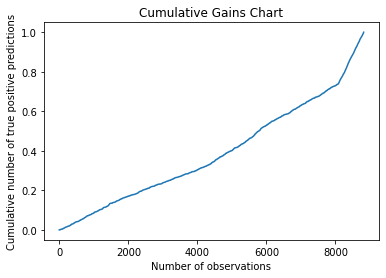

In [ ]:
test_data = test_cred.toPandas().values
data_X = test_data[:, :test_data.shape[1]]
data_y = test_data[:, test_data.shape[1] - 1]
y_preds = fitted_lda.predict(data_X)
print(classification_report(data_y, y_preds))
plot_cumulative_gains(data_y, y_preds)